### Frequency over time of drug and weapons topics



### Importing libraries
Python imports:

In [2]:
!pip install spacy
import spacy
import string
import re
import itertools
import csv
import shutil
import matplotlib.pyplot as plt
import zipfile
import lzma
import json
import requests
import os
import xml.etree.cElementTree as ET
import pandas as pd
import numpy as np
import seaborn as sns
import random
from nltk.corpus import stopwords 

!pip install -U spacy unidecode

from unidecode import unidecode
from spacy.matcher import Matcher 
from spacy import displacy 
from IPython.display import Image, display
import nltk
nltk.download('wordnet')
nltk.download('words')
nltk.download('punkt')

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import skipgrams
from nltk.corpus import wordnet as wn
from spacy.lang.en import English

from tqdm import tqdm
from ipywidgets import FloatProgress
%matplotlib inline


!pip install pyquery
!pip install -U gensim

import gensim
#import pyLDAvis.gensim
import pickle
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
from gensim.parsing.preprocessing import strip_non_alphanum
from gensim.models import CoherenceModel

!pip install -U textblob
from textblob import TextBlob

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hadjiandrea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\hadjiandrea\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadjiandrea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


###  Word Frequency over time

### Weapons topic

In [ ]:
#Reload save pkl file
with open('weapons.pkl', 'rb') as f:
    weapons = pickle.load(f)

In [15]:
weapons.head(5)

,id,year,name,citation,court,author,type,text
0,1156845,1996-03-27,"elsie ghere, widow of jim ghere, deceased, app...",278 ill. app. 3d 840,illinois appellate court,justice colwell,majority,justice colwell\ndelivered the opinion of the ...
1,1156786,1996-02-16,"robert l. o'neil et al., plaintiffs-appellees ...",278 ill. app. 3d 327,illinois appellate court,presiding justice zwick,majority,presiding justice zwick\ndelivered the opinion...
2,1156800,1996-02-26,"in re l.n., a minor (the people of the state o...",278 ill. app. 3d 46,illinois appellate court,justice slater,majority,justice slater\ndelivered the opinion of the c...
3,1156841,1996-02-13,"the people of the state of illinois, plaintiff...",278 ill. app. 3d 218,illinois appellate court,justice scariano,majority,justice scariano\ndelivered the opinion of the...
4,1156843,1996-03-28,"robert alan shramuk, plaintiff-appellant, v. c...",278 ill. app. 3d 745,illinois appellate court,justice geiger,majority,justice geiger\ndelivered the opinion of the c...


In [17]:
opinion_year = weapons[['year', 'text']]

In [18]:
opinion_year.head(5)

,year,text
0,1996-03-27,justice colwell\ndelivered the opinion of the ...
1,1996-02-16,presiding justice zwick\ndelivered the opinion...
2,1996-02-26,justice slater\ndelivered the opinion of the c...
3,1996-02-13,justice scariano\ndelivered the opinion of the...
4,1996-03-28,justice geiger\ndelivered the opinion of the c...


In [ ]:
with open("opinion_year.pkl", "wb") as f:
    pickle.dump(opinion_year, f)

In [3]:
#Reload save pkl file
with open('opinion_year.pkl', 'rb') as f:
    opinion_year = pickle.load(f)

In [4]:
#Convert publish_date into datetime64 format. Sort by date

reindexed_data = opinion_year['text']
reindexed_data.index = opinion_year['year']
reindexed_data.head()

year
1996-03-27    justice colwell\ndelivered the opinion of the ...
1996-02-16    presiding justice zwick\ndelivered the opinion...
1996-02-26    justice slater\ndelivered the opinion of the c...
1996-02-13    justice scariano\ndelivered the opinion of the...
1996-03-28    justice geiger\ndelivered the opinion of the c...
Name: text, dtype: object

In [6]:
drug = [0]*reindexed_data.shape[0]
nonnarcotic = [0]*reindexed_data.shape[0]
marijuana = [0]*reindexed_data.shape[0]
heroin = [0]*reindexed_data.shape[0]
amphetamine = [0]*reindexed_data.shape[0]
narcotic = [0]*reindexed_data.shape[0]
peyote = [0]*reindexed_data.shape[0]
ecstasy = [0]*reindexed_data.shape[0]
codeine = [0]*reindexed_data.shape[0]

In [7]:
for i in range(reindexed_data.shape[0]):
    words = TextBlob(reindexed_data[i]).words
    for word in words:
        if word == "nonnarcotic": nonnarcotic[i]=1
        if word == "drug": drug[i]=1
        if word == "marijuana": marijuana[i]=1
        if word == "heroin": heroin[i]=1
        if word == "amphetamine": amphetamine[i]=1
        if word == "narcotic": narcotic[i]=1
        if word == "peyote": peyote[i]=1
        if word == "ecstasy": ecstasy[i]=1
        if word == "codeine": codeine[i]=1
keywords3 = pd.DataFrame({'text':reindexed_data,
                        'nonnarcotic':nonnarcotic,
                        'drug':drug,
                        'marijuana':marijuana,
                        'heroin':heroin,
                        'amphetamine':amphetamine,
                        'narcotic':narcotic,
                        'peyote':peyote,
                        'ecstasy':ecstasy,
                        'codeine':codeine},
                        index=reindexed_data.index)
keywords3.head()

,text,nonnarcotic,drug,marijuana,heroin,amphetamine,narcotic,peyote,ecstasy,codeine
year,,,,,,,,,,
1996-03-27,justice colwell\ndelivered the opinion of the ...,0,0,0,0,0,0,0,0,0
1996-02-16,presiding justice zwick\ndelivered the opinion...,0,1,0,0,0,0,0,0,0
1996-02-26,justice slater\ndelivered the opinion of the c...,0,0,0,0,0,0,0,0,0
1996-02-13,justice scariano\ndelivered the opinion of the...,0,1,0,0,0,0,0,0,0
1996-03-28,justice geiger\ndelivered the opinion of the c...,0,0,0,0,0,0,0,0,0


In [8]:
keywords3.index =  pd.to_datetime(keywords3.index)

In [9]:
with open("keywords3.pkl", "wb") as f:
    pickle.dump(keywords3, f)

In [9]:
#Reload save pkl file
with open('keywords3.pkl', 'rb') as f:
    keywords3 = pickle.load(f)

In [10]:
#Aggregate monthly frequency for keywords
monthly2 = keywords3.resample('M').sum()
print(monthly2)

            nonnarcotic  drug  marijuana  heroin  amphetamine  narcotic  \
year                                                                      
1771-10-31            0     0          0       0            0         0   
1771-11-30            0     0          0       0            0         0   
1771-12-31            0     0          0       0            0         0   
1772-01-31            0     0          0       0            0         0   
1772-02-29            0     0          0       0            0         0   
...                 ...   ...        ...     ...          ...       ...   
2019-03-31            0    11          4       2            0         0   
2019-04-30            0     8          3       2            0         0   
2019-05-31            0     4          4       1            0         0   
2019-06-30            0     2          3       1            0         1   
2019-07-31            0     2          3       0            0         0   

            peyote  ecst

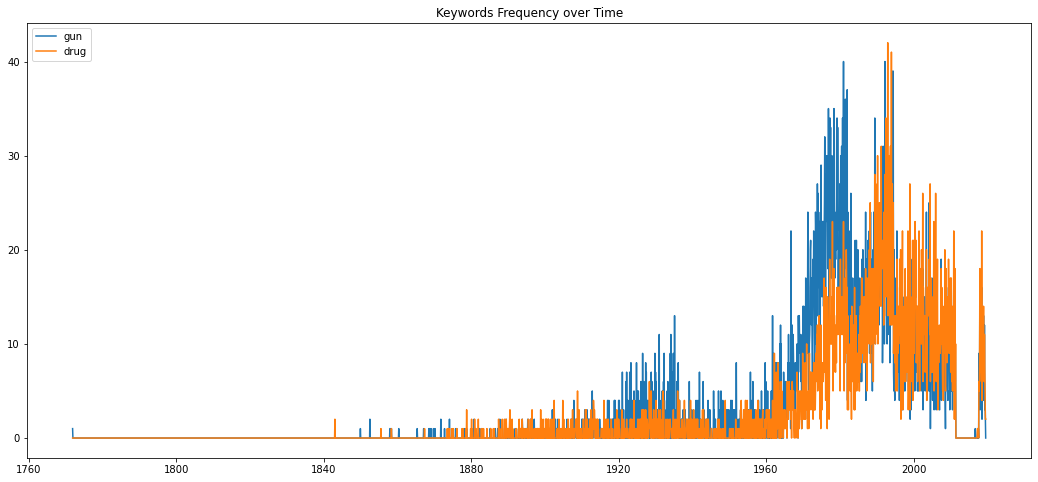

In [11]:
### Plot the frequency over time
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(monthly2['drug'], label='drug');
ax.plot(monthly2['nonnarcotic'], label='nonnarcotic');
ax.plot(monthly2['marijuana'], label='marijuana');
ax.plot(monthly2['heroin'], label='heroin');
ax.plot(monthly2['amphetamine'], label='amphetamine');
ax.plot(monthly2['narcotic'], label='narcotic');
ax.plot(monthly2['peyote'], label='peyote');
ax.plot(monthly2['ecstasy'], label='ecstasy');
ax.plot(monthly2['codeine'], label='codeine');

ax.set_title('Keywords Frequency over Time');
ax.legend(loc='upper left');

In [11]:
yearly2 = keywords3.resample('A').sum()
print(yearly2)

            nonnarcotic  drug  marijuana  heroin  amphetamine  narcotic  \
year                                                                      
1771-12-31            0     0          0       0            0         0   
1772-12-31            0     0          0       0            0         0   
1773-12-31            0     0          0       0            0         0   
1774-12-31            0     0          0       0            0         0   
1775-12-31            0     0          0       0            0         0   
...                 ...   ...        ...     ...          ...       ...   
2015-12-31            0     0          0       0            0         0   
2016-12-31            0     0          0       0            0         0   
2017-12-31            0    41         10       5            1         2   
2018-12-31            0   131         47      26            1        11   
2019-12-31            0    42         21       8            0         1   

            peyote  ecst

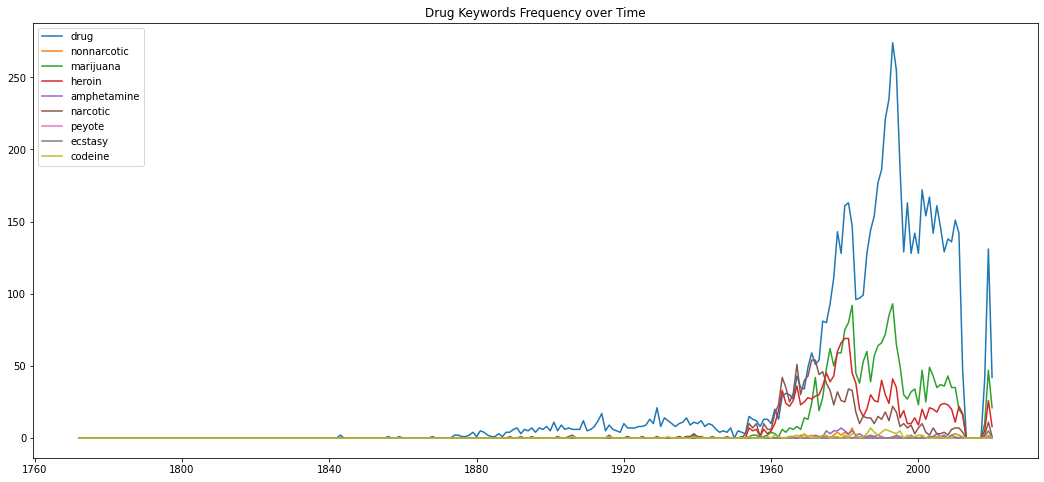

In [13]:
#Plot the frequency over time
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(yearly2['drug'], label='drug');
ax.plot(yearly2['nonnarcotic'], label='nonnarcotic');
ax.plot(yearly2['marijuana'], label='marijuana');
ax.plot(yearly2['heroin'], label='heroin');
ax.plot(yearly2['amphetamine'], label='amphetamine');
ax.plot(yearly2['narcotic'], label='narcotic');
ax.plot(yearly2['peyote'], label='peyote');
ax.plot(yearly2['ecstasy'], label='ecstasy');
ax.plot(yearly2['codeine'], label='codeine');
ax.set_title('Drug Keywords Frequency over Time');
ax.legend(loc='upper left');

### Drug topic

In [ ]:
#Reload save pkl file
with open('drug.pkl', 'rb') as f:
    drug = pickle.load(f)

In [ ]:
drug.head()

In [ ]:
opinion_year_drug = drug[['year', 'text']]

In [ ]:
opinion_year_drug.head()

In [ ]:
with open("opinion_year_drug.pkl", "wb") as f:
    pickle.dump(opinion_year_drug, f)

In [ ]:
#Reload save pkl file
with open('opinion_year_drug.pkl', 'rb') as f:
    opinion_year_drug = pickle.load(f)

In [ ]:
#Convert publish_date into datetime64 format. Sort by date
reindexed_data = opinion_year_drug['text']
reindexed_data.index = opinion_year_drug['year']
reindexed_data.head()

In [14]:
reindexed_data = opinion_year_drug['text']
reindexed_data.index = opinion_year_drug['year']
reindexed_data.head()

year
1996-03-27    justice colwell\ndelivered the opinion of the ...
1996-02-16    presiding justice zwick\ndelivered the opinion...
1996-02-26    justice slater\ndelivered the opinion of the c...
1996-02-13    justice scariano\ndelivered the opinion of the...
1996-03-28    justice geiger\ndelivered the opinion of the c...
Name: text, dtype: object

In [15]:
revolver = [0]*reindexed_data.shape[0]
gun = [0]*reindexed_data.shape[0]
shotgun = [0]*reindexed_data.shape[0]
rifle = [0]*reindexed_data.shape[0]
handgun = [0]*reindexed_data.shape[0]
weapon = [0]*reindexed_data.shape[0]
holster = [0]*reindexed_data.shape[0]
semiautomatic = [0]*reindexed_data.shape[0]
weapon = [0]*reindexed_data.shape[0]

In [16]:
for i in range(reindexed_data.shape[0]):
    words = TextBlob(reindexed_data[i]).words
    for word in words:
        if word == "revolver": revolver[i]=1
        if word == "gun": gun[i]=1
        if word == "shotgun": shotgun[i]=1
        if word == "rifle": rifle[i]=1
        if word == "handgun": handgun[i]=1
        if word == "weapon": weapon[i]=1
        if word == "holster": holster[i]=1
        if word == "semiautomatic": semiautomatic[i]=1
        if word == "weapon": weapon[i]=1
keywords4 = pd.DataFrame({'text':reindexed_data,
                        'revolver':revolver,
                        'gun':gun,
                        'shotgun':shotgun,
                        'rifle':rifle,
                        'handgun':handgun,
                        'weapon':weapon,
                        'holster':holster,
                        'semiautomatic':semiautomatic,
                        'weapon':weapon},
                        index=reindexed_data.index)
keywords4.head()

,text,revolver,gun,shotgun,rifle,handgun,weapon,holster,semiautomatic
year,,,,,,,,,
1996-03-27,justice colwell\ndelivered the opinion of the ...,0,0,0,0,0,0,0,0
1996-02-16,presiding justice zwick\ndelivered the opinion...,0,0,0,0,0,0,0,0
1996-02-26,justice slater\ndelivered the opinion of the c...,0,0,0,0,0,0,0,0
1996-02-13,justice scariano\ndelivered the opinion of the...,0,0,0,0,0,0,0,0
1996-03-28,justice geiger\ndelivered the opinion of the c...,0,0,0,0,0,0,0,0


In [17]:
keywords4.index =  pd.to_datetime(keywords4.index)

In [18]:
with open("keywords4.pkl", "wb") as f:
    pickle.dump(keywords4, f)

In [ ]:
#Reload save pkl file
with open('keywords4.pkl', 'rb') as f:
    keywords4 = pickle.load(f)

In [19]:
#Aggregate monthly frequency for keywords
monthly2 = keywords4.resample('M').sum()
print(monthly2)

            revolver  gun  shotgun  rifle  handgun  weapon  holster  \
year                                                                  
1771-10-31         1    1        0      0        0       0        0   
1771-11-30         0    0        0      0        0       0        0   
1771-12-31         0    0        0      0        0       0        0   
1772-01-31         0    0        0      0        0       0        0   
1772-02-29         0    0        0      0        0       0        0   
...              ...  ...      ...    ...      ...     ...      ...   
2019-03-31         4   12        1      0       12      16        0   
2019-04-30         2    3        0      0        1       2        0   
2019-05-31         2    4        1      1        1       4        0   
2019-06-30         1    2        0      0        2       4        1   
2019-07-31         0    0        1      0        0       0        0   

            semiautomatic  
year                       
1771-10-31          

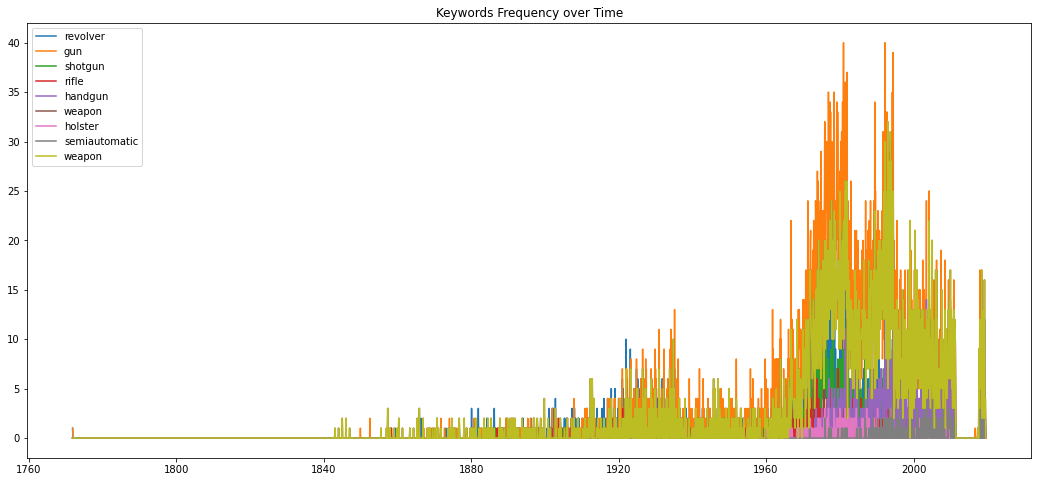

In [20]:
### Plot the frequency over time
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(monthly2['revolver'], label='revolver');
ax.plot(monthly2['gun'], label='gun');
ax.plot(monthly2['shotgun'], label='shotgun');
ax.plot(monthly2['rifle'], label='rifle');
ax.plot(monthly2['handgun'], label='handgun');
ax.plot(monthly2['weapon'], label='weapon');
ax.plot(monthly2['holster'], label='holster');
ax.plot(monthly2['semiautomatic'], label='semiautomatic');
ax.plot(monthly2['weapon'], label='weapon');

ax.set_title('Keywords Frequency over Time');
ax.legend(loc='upper left');

In [21]:
yearly2 = keywords4.resample('A').sum()
print(yearly2)

            revolver  gun  shotgun  rifle  handgun  weapon  holster  \
year                                                                  
1771-12-31         1    1        0      0        0       0        0   
1772-12-31         0    0        0      0        0       0        0   
1773-12-31         0    0        0      0        0       0        0   
1774-12-31         0    0        0      0        0       0        0   
1775-12-31         0    0        0      0        0       0        0   
...              ...  ...      ...    ...      ...     ...      ...   
2015-12-31         0    0        0      0        0       0        0   
2016-12-31         0    1        0      0        0       0        0   
2017-12-31         9   39        1      2       17      33        0   
2018-12-31        22   98        9      8       58     100        2   
2019-12-31        11   30        4      1       19      33        1   

            semiautomatic  
year                       
1771-12-31          

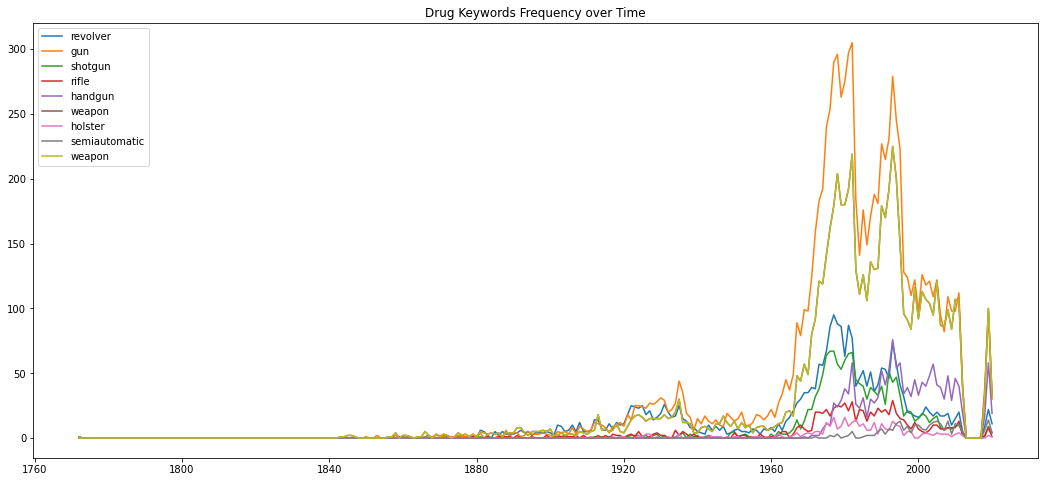

In [22]:
#Plot the frequency over time
fig, ax = plt.subplots(figsize=(18,8))

ax.plot(yearly2['revolver'], label='revolver');
ax.plot(yearly2['gun'], label='gun');
ax.plot(yearly2['shotgun'], label='shotgun');
ax.plot(yearly2['rifle'], label='rifle');
ax.plot(yearly2['handgun'], label='handgun');
ax.plot(yearly2['weapon'], label='weapon');
ax.plot(yearly2['holster'], label='holster');
ax.plot(yearly2['semiautomatic'], label='semiautomatic');
ax.plot(yearly2['weapon'], label='weapon');
ax.set_title('Weapons Keywords Frequency over Time');
ax.legend(loc='upper left');

### Number of documents per year

Try to explain the words frequency differences between year 1960-1980-2000. It seems like the words are more frequent because the number of court texts are bigger in 1980.

In [45]:
opinion_year_60 = keywords4.loc["1960"]

In [46]:
opinion_year_60.head()

,text,revolver,gun,shotgun,rifle,handgun,weapon,holster,semiautomatic
year,,,,,,,,,
1960-07-26,mr. justice bryant\ndelivered the opinion of t...,0,0,0,0,0,0,0,0
1960-06-20,opinion by\npresiding justice mcneal.\nnot to ...,0,0,0,0,0,0,0,0
1960-05-24,opinion by\njustice kiley.\nnot to be publishe...,0,0,0,0,0,0,0,0
1960-07-26,opinion by\njustice friend.\nnot to be publish...,0,0,0,0,0,0,0,0
1960-07-01,mr. presiding justice kiley\ndelivered the opi...,0,0,0,0,0,0,0,0


In [48]:
len(opinion_year_60.index)

714

In [49]:
opinion_year_80 = keywords4.loc["1980"]

In [50]:
opinion_year_80.head()

,text,revolver,gun,shotgun,rifle,handgun,weapon,holster,semiautomatic
year,,,,,,,,,
1980-11-26,mr. justice kasserman\ndelivered the opinion o...,0,0,0,0,0,0,0,0
1980-12-11,mr. presiding justice linn\ndelivered the opin...,0,0,0,0,0,0,0,0
1980-12-03,mr. justice rizzi\ndelivered the opinion of th...,0,0,0,0,0,0,0,0
1980-12-02,mr. justice downing\ndelivered the opinion of ...,0,0,0,0,0,0,0,0
1980-12-12,mr. justice van deusen\ndelivered the opinion ...,0,0,0,0,0,0,0,0


In [51]:
len(opinion_year_80.index)

2820

In [53]:
opinion_year_02 = keywords4.loc["2000"]

In [55]:
opinion_year_02.head()

,text,revolver,gun,shotgun,rifle,handgun,weapon,holster,semiautomatic
year,,,,,,,,,
2000-12-28,presiding justice slater\ndelivered the opinio...,0,0,0,0,0,0,0,0
2000-12-22,justice quinn\ndelivered the opinion of the co...,0,0,0,0,0,0,0,0
2000-12-29,justice buckley\ndelivered the opinion of the ...,0,1,0,0,0,0,0,0
2000-12-29,"presiding justice campbell,\ndissenting in par...",0,0,0,0,0,0,0,0
2000-11-09,justice zwick\ndelivered the opinion of the co...,0,0,0,0,0,0,0,0


In [56]:
len(opinion_year_02.index)

1376